In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
def load_data():
    path = r"../input/datasets-for-regression/Bank_Customer_Churn_Prediction/Bank_Customer_Churn_Prediction.csv"
    
    df = pd.read_csv(path, header=None, delimiter=",")
    df = df.drop(0, axis=1)
    features = df.iloc[1:, 0:10]
    labels = df.iloc[1:, -1]
    return (features, labels)

In [3]:
# Standardization: Standard Deviation Nomalization
def SD_normalization(features):
    features = features.reset_index(drop = True)
    m = 0
    means = []
    s = 0
    sd = []
    temp_mean = 0
    sum_of_diff = 0
    cols_to_normalize = [6, 10]
    
    for col in cols_to_normalize:
        for row in range(10000): 
            temp_mean = temp_mean + float(features[col][row])
        means.append(temp_mean / 1000)
        temp_mean = 0
        
    for col in cols_to_normalize:
        for row in range(10000): 
            sum_of_diff = sum_of_diff + ((float(features[col][row]) - means[m]) ** 2)
        sd.append(sum_of_diff / 1000)
        sum_of_diff = 0
        m = 1
    m = 0    
    for col in cols_to_normalize:
        for row in range(10000):
            features[col][row] = (float(features[col][row]) - means[m]) / sd[s]
        m += 1
        s += 1

    print(features)
    return features

In [4]:
def one_hot_encode(features):
    encoded_country = pd.get_dummies(features[2])
    encoded_gender = pd.get_dummies(features[3])
    
    merged_columns = pd.concat([encoded_country, encoded_gender], axis = "columns")
    features = pd.concat([features, merged_columns], axis = "columns")
    features = features.drop([2, 3], axis = "columns")
    return features

In [5]:
def split_data(features, labels):
    total_samples = features.shape[0]
    feature_columns = features.columns.values.tolist()
    test_split_size = int(np.ceil((30 / 100) * total_samples))
    
    train_x, test_x, train_y, test_y = train_test_split(features, labels, test_size = test_split_size)

    train_x = train_x.reset_index(drop = True)
    test_x = test_x.reset_index(drop = True)
    train_y = train_y.reset_index(drop = True)
    test_y = test_y.reset_index(drop = True)
    
    train_y = train_y.astype(float)
    test_y = test_y.astype(float)

    for column in feature_columns:
        train_x[column] = train_x[column].astype(float)
        test_x[column] = test_x[column].astype(float)

    return (train_x, test_x, train_y, test_y)

In [6]:
def h_function(features, weights, bias):
    y_hat = np.dot(weights, features.T)
    y_hat += bias
    y_hat = sigmoid(y_hat)
    return y_hat

In [7]:
def cost_function(y, y_hat, total_samples):
    cost = (-1 / total_samples) * np.sum(y * np.log(0.1 + y_hat) + (1 - y) * np.log(0.1 + 1 - y_hat))
    return cost

In [8]:
def gradient_descent_weights(samples, train_f, y, y_hat):
    diff = y_hat - y
    dl_dw = np.dot(train_f.T, diff)
    dl_dw = (1 / samples) * dl_dw
    return dl_dw

In [9]:
def gradient_descent_bias(samples, y, y_hat):
    diff = np.sum(y_hat - y)
    dl_db = (1 / samples) * diff
    return dl_db

In [10]:
def plot_data(train_costs, test_costs, epochs):
    plt.plot(epochs, train_costs, 'g', label = "Training Cost")
    plt.plot(epochs, test_costs, 'r', label = "Testing Cost")
    plt.legend()
    plt.gca().set_ylim(top=10)
    plt.gca().set_ylim(bottom=-0.5)
    plt.show()

In [11]:
def evaluate(weights, bias, test_f, test_l):
    y_hat = h_function(test_f, weights, bias)
    cost = cost_function(test_l, y_hat, test_f.shape[0])
    return cost

In [12]:
def calculate_accuracy(weights, bias, test_f, test_l):
    y_hat = h_function(test_f, weights, bias)
    
    y_hat_classes = []
    for val in y_hat:
        if val >= 0.5: 
            y_hat_classes.append(1)
        else: 
            y_hat_classes.append(0)
    
    classes = []        
    for index in range(3000):
        if y_hat_classes[index] == test_l[index]:
            classes.append(1)
        else:
            classes.append(0)
    
    accuracy = np.sum(classes) / 3000
    return accuracy

In [13]:
def sigmoid(y_hat):
    y_hat = 1 / (1 + np.exp(-y_hat))
    return y_hat

In [14]:
features, labels = load_data()
features = one_hot_encode(features)
# features = SD_normalization(features)
train_f, test_f, train_l, test_l = split_data(features, labels)

In [15]:
lr = 0.01
epochs = 10000
weights = np.array([0.1, -0.3, 0.3, -0.1, 0.3, -0.2, 0.1, 0.4, -0.4, -0.4, 0.1, 0.1, 0.3])
bias = 1

total_train_samples = train_f.shape[0]
train_costs = []
test_costs = []
epochs_list = []

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


Training Cost after 10000 epochs is 1.1663252901551604
Testing Cost after 0.38346957633108303
Accuracy = 0.8003333333333333
Epoch: 10000, Learing Rate: 0.01


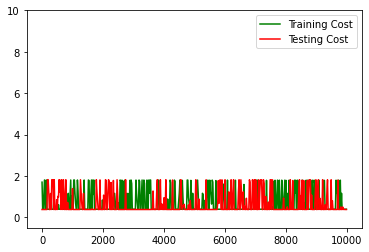

In [16]:
for i in range(epochs):
    y_hat = h_function(train_f, weights, bias)
    train_cost = cost_function(train_l, y_hat, total_train_samples)
    
    # Update Weights 
    dl_dw = gradient_descent_weights(total_train_samples, train_f, train_l, y_hat)
    weights = weights - lr * dl_dw
    
    # Update Bias
    dl_db = gradient_descent_bias(total_train_samples, train_l, y_hat)
    bias = bias - lr * dl_db
    
    test_cost = evaluate(weights, bias, test_f, test_l)
    
    if i % 20 == 0:
        train_costs.append(train_cost)    
        test_costs.append(test_cost)
        epochs_list.append(i)
    
    if i == (epochs - 1):
        print(f"Training Cost after {i + 1} epochs is {train_cost}")
        print(f"Testing Cost after {test_cost}")


accuracy = calculate_accuracy(weights, bias, test_f, test_l)
print(f"Accuracy = {accuracy}")
print(f"Epoch: {epochs}, Learing Rate: {lr}")
plot_data(train_costs, test_costs, epochs_list)